# Bharat Intern

## Task 3 : Titanic Classification

### by - ARJUNSINGH RAWAT

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

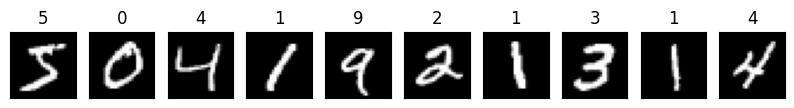

In [3]:
# Display the first 10 images from the training dataset
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(10,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

C:\Users\ARJUN\AppData\Local\Temp\ipykernel_32568\2204507236.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


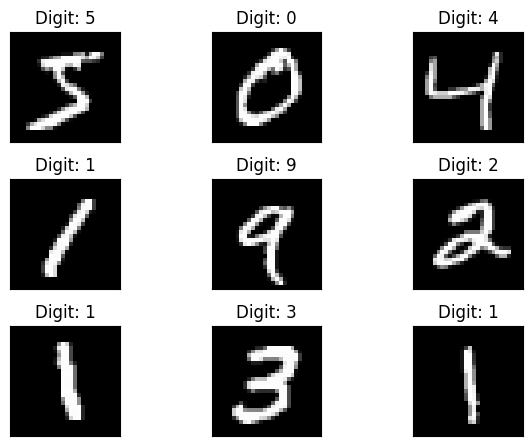

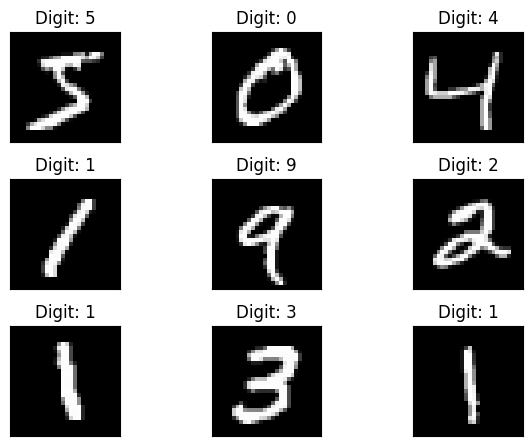

In [4]:
# Display a 3x3 grid of images with their corresponding labels
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Text(0.5, 1.0, 'Pixel Value Distribution')

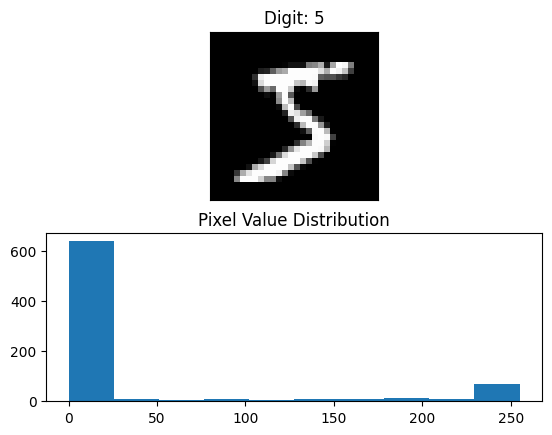

In [5]:
# Display two images: one with its label and the other with a pixel value histogram
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [6]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [7]:
# Print the count of unique labels in the training dataset
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
# Build a sequential neural network model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
model.save('number_recog_mnist.h5')

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Epoch 1/20
469/469 - 17s - loss: 0.2496 - accuracy: 0.9249 - val_loss: 0.1099 - val_accuracy: 0.9667 - 17s/epoch - 37ms/step
Epoch 2/20
469/469 - 14s - loss: 0.1025 - accuracy: 0.9680 - val_loss: 0.0726 - val_accuracy: 0.9764 - 14s/epoch - 30ms/step
Epoch 3/20
469/469 - 14s - loss: 0.0729 - accuracy: 0.9770 - val_loss: 0.0825 - val_accuracy: 0.9743 - 14s/epoch - 30ms/step
Epoch 4/20
469/469 - 14s - loss: 0.0575 - accuracy: 0.9818 - val_loss: 0.0686 - val_accuracy: 0.9798 - 14s/epoch - 31ms/step
Epoch 5/20
469/469 - 14s - loss: 0.0456 - accuracy: 0.9852 - val_loss: 0.0565 - val_accuracy: 0.9832 - 14s/epoch - 30ms/step
Epoch 6/20
469/469 - 14s - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.0801 - val_accuracy: 0.9783 - 14s/epoch - 30ms/step
Epoch 7/20
469/469 - 14s - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0604 - val_accuracy: 0.9825 - 14s/epoch - 30ms/step
Epoch 8/20
469/469 - 14s - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0663 - val_accuracy: 0.9819 - 14s/epoch - 30ms/step


In [ ]:
# Load the model again and make predictions on the test set
mnist_model = load_model("number_recog_mnist.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
# load the model and create predictions on the test set
mnist_model = load_model("number_recog_mnist.h5")
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

# Identify correct and incorrect predictions
correct_indices = np.nonzero(predict_x == Y_test)[0]
incorrect_indices = np.nonzero(classes_x != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adjust figure size for the evaluation plots
plt.rcParams['figure.figsize'] = (7,7)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')

    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, True: {}".format(classes_x[incorrect], y_test[incorrect]))

    plt.xticks([])
    plt.yticks([])
    
    
plt.tight_layout()
plt.show()